**Advanced Causal Analysis and Visualization: Insights from the Heart Disease Dataset**

Causal Inference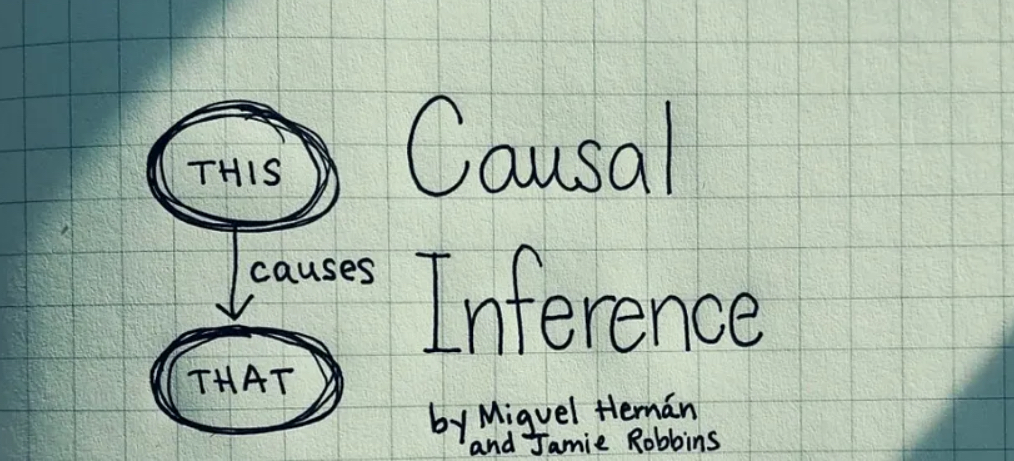






















INFO 7390 Advances Data Sciences and Architecture SEC 03 Fall 2024
Crash Course in Casuality
Shreya Deshpande NUID : 001002875

At the heart of data science lies a fundamental quest: understanding causality. This pursuit goes beyond identifying patterns to uncovering the mechanisms driving relationships between variables. Causality seeks to illuminate how actions lead to consequences, offering insights far more profound than mere correlation.

Imagine a world where each observed event provides a window into an intricate network of cause and effect. Here, grasping the true catalysts of change becomes crucial, guiding us towards impactful interventions and away from misleading associations.

However, the journey to causal understanding is fraught with challenges:

- Observational data's inherent uncertainty, where hidden confounders can distort our perception of reality
- The causal inference dilemma: discerning true effects when only one outcome is observable

To navigate these complexities, we employ an array of causal inference methods. Randomized controlled trials (RCTs) stand out as beacons of experimental rigor, shedding light on causal pathways previously obscured.

Causal inference demands critical thinking, challenging assumptions, and embracing the intricacies of our world. It invites us to delve deeper, uncovering hidden narratives within our data and charting a course towards genuine understanding.

In this exploration, we'll journey together through the theory underpinning causal inference, examine practical applications that bring it to life, and confront the challenges that lie ahead. Join us as we venture into the realm of causality, where every inquiry holds the potential for discovery, and each answer brings us closer to comprehending the world around us.


Methods for Causal Inference
Causal inference methods can be broadly categorized into two main groups based on the type of data available:

1. Experimental Methods:
   - Randomized Controlled Trials (RCTs): Considered the gold standard for establishing causality, particularly in medicine. Subjects are randomly assigned to treatment or control groups, ensuring observed differences in outcomes are attributable to the treatment.
   - Natural Experiments: Exploit situations where external factors create treatment and control groups by chance, allowing causal inferences without direct manipulation of variables.

2. Observational Methods:
   - Instrumental Variables: Address confounding and endogeneity issues by using external factors related to the independent variable but not to unobserved factors.
   - Difference-in-Differences: Compares changes in outcomes between treatment and control groups before and after an intervention.
   - Propensity Score Matching: Matches treated and control units based on their likelihood of receiving treatment, as predicted by observed characteristics.

These methods form a toolkit for researchers to draw causal inferences from various types of data, each with its own strengths and limitations depending on the research context

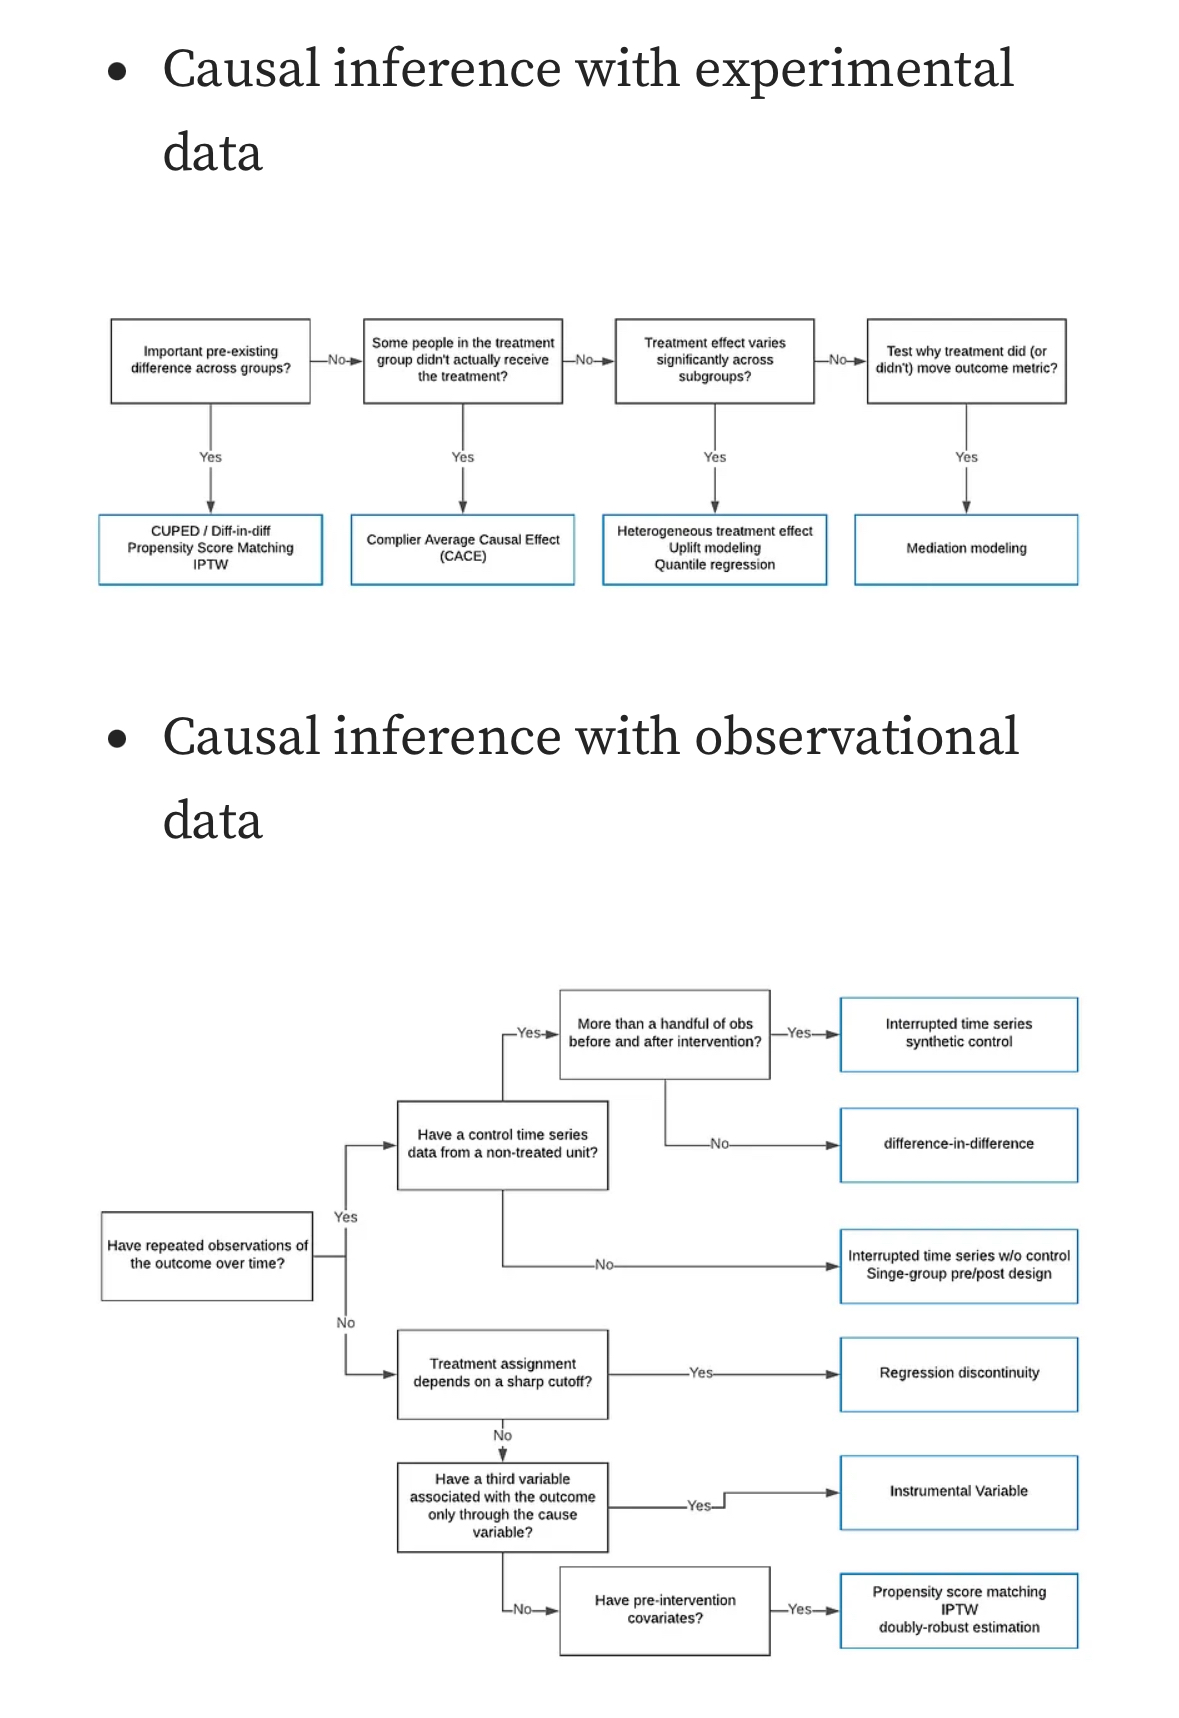


1.
Principles of Causality and DAGs Causal Inference
Causal inference helps distinguish causation from correlation. For example: High cholesterol may correlate with heart disease, but does it cause heart disease? Directed Acyclic Graphs (DAGs) can help identify confounding variables and causal pathways. Directed Acyclic Graphs (DAGs)

DAGs are visual tools for representing causal relationships. Nodes represent variables, and edges represent causal influences. Example: Cholesterol → Heart Disease indicates cholesterol affects heart disease risk. DAGs are acyclic, meaning no loops exist in the graph.

2. Load and Explore Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load the Heart Disease UCI dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(data_url, names=columns)

# Replace '?' with NaN and convert to numeric
data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')


3. Causal Graphs with NetworkX
Markdown Explanation:

Below, we construct a causal graph (DAG) representing relationships between features in the Heart Disease dataset.
We hypothesize that:
Cholesterol (chol) affects heart disease (target).
Age influences both cholesterol and heart disease risk.
Exercise-induced angina (exang) may mediate between fitness levels and heart disease.

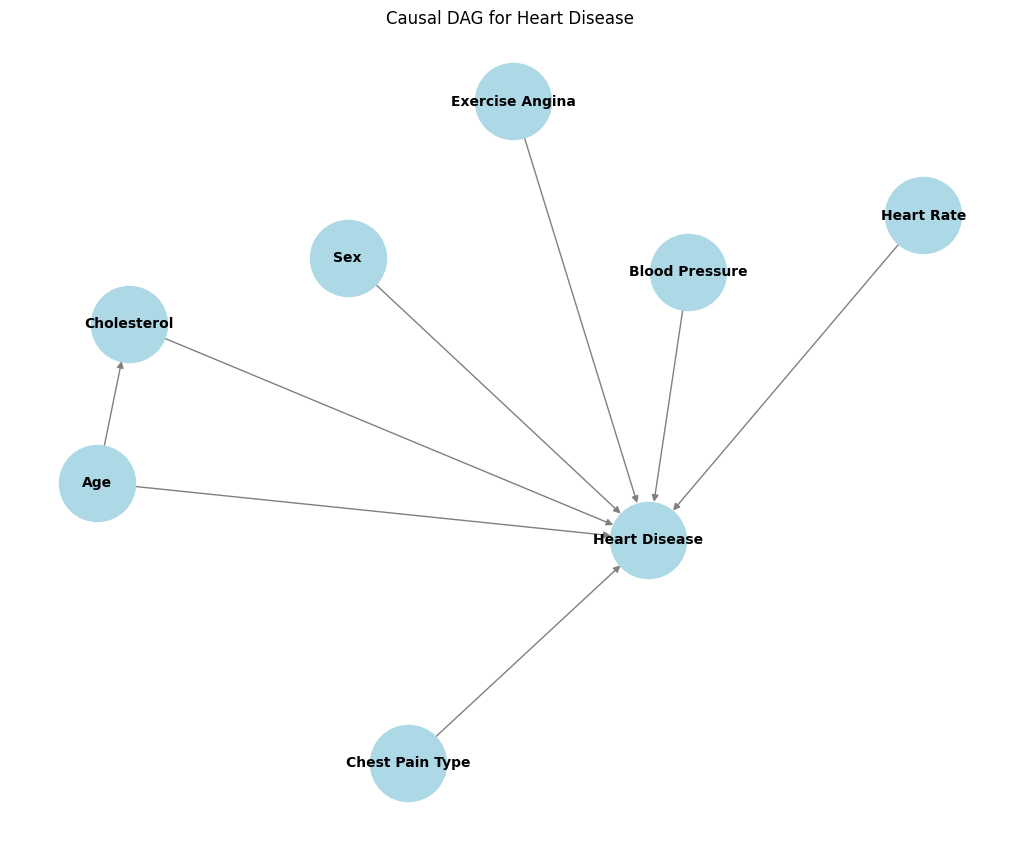

In [ ]:
# Create a DAG representing causal relationships
dag = nx.DiGraph()

# Adding nodes (variables)
dag.add_nodes_from([
    "Age", "Sex", "Chest Pain Type", "Cholesterol", "Blood Pressure",
    "Heart Rate", "Exercise Angina", "Heart Disease"
])

# Adding edges (causal relationships)
dag.add_edges_from([
    ("Age", "Cholesterol"),
    ("Age", "Heart Disease"),
    ("Sex", "Heart Disease"),
    ("Chest Pain Type", "Heart Disease"),
    ("Cholesterol", "Heart Disease"),
    ("Blood Pressure", "Heart Disease"),
    ("Exercise Angina", "Heart Disease"),
    ("Heart Rate", "Heart Disease"),
])

# Draw the DAG
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Causal DAG for Heart Disease")
plt.show()


4. Handle Missing Data
Markdown Explanation:

Missing data can bias causal inference if not handled carefully.
Here, we use median imputation to fill missing values while ensuring the causal relationships remain interpretable.

In [ ]:
# Select relevant features based on the DAG
selected_features = ["age", "sex", "cp", "chol", "trestbps", "thalach", "exang", "target"]
data_selected = data[selected_features]

# Check for missing data
data_selected.isnull().sum()


age         0
sex         0
cp          0
chol        0
trestbps    0
thalach     0
exang       0
target      0
dtype: int64

In [ ]:
# Impute missing values with the median
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data_selected), columns=selected_features)

# Verify imputation
data_imputed.isnull().sum()


age         0
sex         0
cp          0
chol        0
trestbps    0
thalach     0
exang       0
target      0
dtype: int64

5. Encode Categorical Variables
Markdown Explanation:

Categorical variables like sex and cp (chest pain type) must be encoded for analysis.
One-hot encoding is used to preserve interpretability and causal relationships.

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import sklearn

# Check scikit-learn version
print("Scikit-learn version:", sklearn.__version__)

# Use sparse=False for older versions
if sklearn.__version__ >= "1.2":
    encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
else:
    encoder = OneHotEncoder(sparse=False, drop="first", handle_unknown="ignore")

# Perform encoding
encoded = encoder.fit_transform(data_imputed[categorical_columns])

# Add encoded columns back to the dataset
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
data_encoded = pd.concat([data_imputed.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the updated dataset
data_encoded.head()


Scikit-learn version: 1.0.2


age   chol  trestbps  thalach  exang  target  sex_1.0  cp_2.0  cp_3.0  \
0  63.0  233.0     145.0    150.0    0.0     0.0      1.0     0.0     0.0   
1  67.0  286.0     160.0    108.0    1.0     2.0      1.0     0.0     0.0   
2  67.0  229.0     120.0    129.0    1.0     1.0      1.0     0.0     0.0   
3  37.0  250.0     130.0    187.0    0.0     0.0      1.0     0.0     1.0   
4  41.0  204.0     130.0    172.0    0.0     0.0      0.0     1.0     0.0   

   cp_4.0  
0     0.0  
1     1.0  
2     1.0  
3     0.0  
4     0.0

6. Correlation vs. Causation
Markdown Explanation:

A correlation heatmap visualizes the relationships between variables.
However, correlation alone cannot confirm causation; causal graphs and domain knowledge are essential.

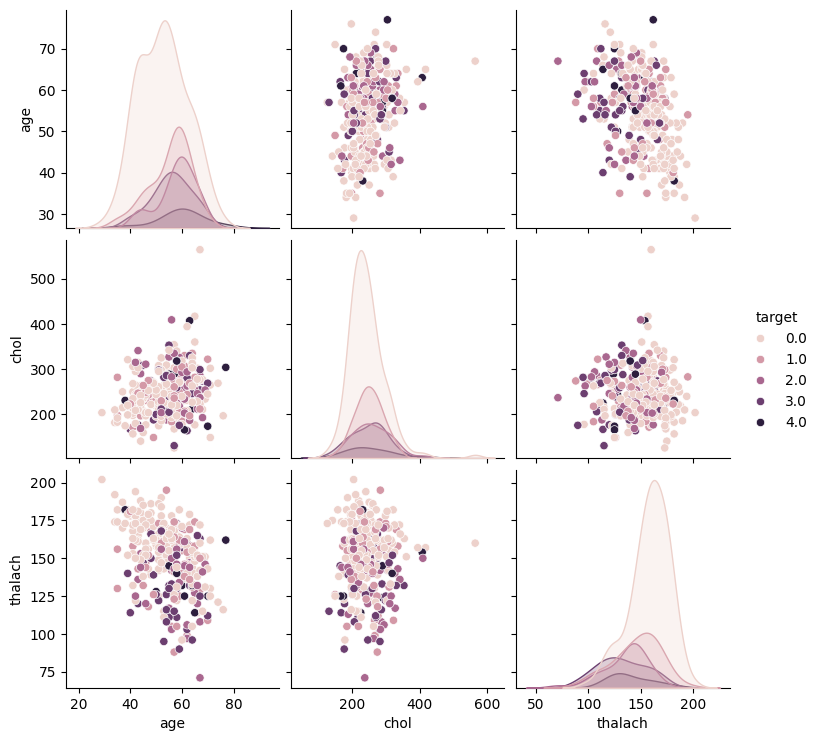

In [ ]:
# Visualize relationships between key features and target
sns.pairplot(data_encoded, vars=["age", "chol", "thalach"], hue="target", diag_kind="kde")
plt.show()


In [ ]:
pip install lingam


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  modifications of the input.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in 

Causal Ordering: ['exang', 'chol', 'target', 'thalach', 'age']


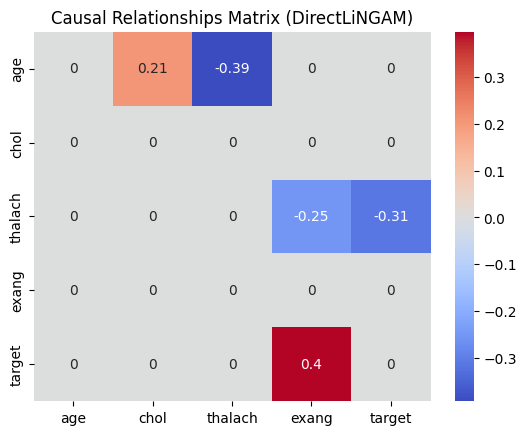

In [23]:
import pandas as pd
import numpy as np
from lingam import DirectLiNGAM, BootstrapResult
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Adjust category if needed

# Ensure data has no missing values
if data_encoded.isnull().sum().sum() > 0:
    print("Handling missing values...")
    data_encoded.fillna(data_encoded.median(), inplace=True)

# Select a subset of features
features = ["age", "chol", "thalach", "exang", "target"]
data_lingham = data_encoded[features]

# Ensure all columns are numeric
if not all(np.issubdtype(data_lingham[col].dtype, np.number) for col in features):
    raise ValueError("All columns must be numeric. Check your data types.")

# Normalize data for better performance (optional)
data_lingham = (data_lingham - data_lingham.mean()) / data_lingham.std()

# Apply the DirectLiNGAM algorithm
lingam_model = DirectLiNGAM()
lingam_model.fit(data_lingham)

# Extract causal ordering
causal_order = lingam_model.causal_order_
print("Causal Ordering:", [features[i] for i in causal_order])

# Visualize the causal matrix
causal_matrix = lingam_model.adjacency_matrix_
sns.heatmap(causal_matrix, annot=True, cmap="coolwarm", xticklabels=features, yticklabels=features)
plt.title("Causal Relationships Matrix (DirectLiNGAM)")
plt.show()


**Conclusion I **

Introduction to Causality in Predictive Modeling
Causality refers to the relationship between cause and effect. In predictive modeling, understanding causality helps us identify which features have a direct impact on the predicted outcome. It goes beyond mere correlation and aims to uncover the true cause-and-effect relationships.

Relevance of Causality in Predictive Modeling:
Causality is crucial in predictive modeling for several reasons:

Feature Selection: Identifying causal relationships helps in selecting the most relevant features for prediction.

Model Interpretability: Understanding causality enhances the interpretability of predictive models, making it easier to explain why certain predictions are made.

Intervention Strategies: Causality guides intervention strategies by identifying factors that, when manipulated, can lead to desired outcomes.

How Causality Contributes to Solving Predictive Modeling Problems
Causality contributes by providing a framework to establish cause-and-effect relationships, allowing for more accurate predictions and informed decision-making. It helps address issues related to confounding variables and ensures that predictions are based on true causal relationships.

COMMON CONFUSION:
Confusing Correlation with Causation: One must avoid assuming causation solely based on correlation. The fact that two variables are correlated does not imply a direct cause-and-effect relationship between them.

Omitted Variable Bias: There is a risk of omitted variable bias, where an unaccounted-for variable, known as a lurking variable, may be responsible for the observed correlation between two variables. Failing to include all relevant factors in the analysis can lead to misleading conclusions.

Reverse Causation: It's important to consider the possibility of reverse causation. Instead of one variable causing the other, the causal relationship may be in the opposite direction, where the effect influences the cause.

**Conclusion II**



In conclusion, understanding causality is crucial in many fields, including public health, economics, and social sciences. Correlation and causation can often be confused, but causal inference methods help us distinguish between the two. Causal diagrams and model checking help us identify potential confounding factors and design appropriate experiments to infer causality. Treatment effects are a key component of causal inference, and different types of treatment effects can be estimated depending on the research question. However, there are many challenges in inferring causality, such as selection bias, reverse causality, and unobserved confounding. Applying causal inference methods to real-world problems, such as Medical sector, can help us identify interventions that can improve public health. By incorporating these concepts into research and decision-making, we can make more informed and impactful decisions.



Key Takeaway



**Causality vs. Correlation:**

Causality establishes a cause-and-effect relationship, while correlation merely shows an association.
Tools like Directed Acyclic Graphs (DAGs) help map causal pathways.
Data Preparation is Critical:

Handling missing data, selecting appropriate features, and encoding categorical variables are essential steps to preserve causal relationships.
Causal Graphs and Lingam:

DAGs visually represent causal structures and assist in identifying confounders, mediators, and direct effects.
The Lingam algorithm provides a data-driven approach to discover causal ordering in linear, non-Gaussian systems.
Advanced Techniques:

Bootstrap methods validate the stability of causal findings.
Partial dependency plots and adjacency matrices help visualize the effect of variables on outcomes and confirm causal relationships.
Real-World Applications:

From healthcare to business analytics, causal inference is invaluable for making informed decisions and designing effective interventions.

**References**


CausalInference: https://causalinferenceinpython.org/

Causal inference- Carnegie melon University: https://blog.ml.cmu.edu/2020/08/31/7-causality/

https://www.kaggle.com/code/sasakitetsuya/what-causes-pm2-5/notebook

https://towardsdatascience.com/

causal-inference-for-data-scientists-part-1-f97fa8614143

ChatGPT

Youtube Channel: Data Science Festival

https://www.formula1.com/